In [1]:
import pandas as pd

In [2]:
import numpy as np

In [57]:
data=pd.read_csv(r"C:\Users\dell\Downloads\glass.csv")

In [58]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [59]:
x=data.drop('Type',axis=1)

In [60]:
y=data['Type']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [63]:
test_y.shape

(43,)

In [64]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
train_x=scaler.fit_transform(train_x)

In [71]:
test_x=scaler.fit_transform(test_x)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [91]:
classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
classifier.score(train_x,train_y)

0.8421052631578947

In [93]:
classifier.score(test_x,test_y)

0.7674418604651163

In [77]:
y_pred=classifier.predict(test_x)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y, y_pred))

[[13  1  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  1  0  1  1  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.68      0.93      0.79        14
           2       0.71      0.71      0.71        14
           3       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         2
           6       1.00      0.25      0.40         4
           7       1.00      1.00      1.00         7

    accuracy                           0.74        43
   macro avg       0.65      0.57      0.57        43
weighted avg       0.73      0.74      0.71        43



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))

In [83]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

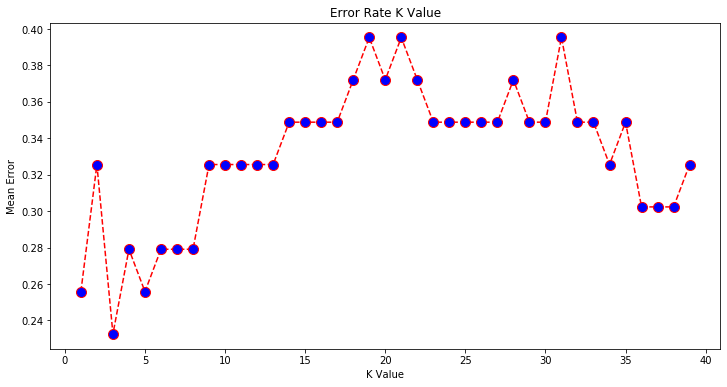

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')